In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive

In [24]:
# Mounting the Google Drive locally. Allows me to access my own drives.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
dataset = pd.read_csv('/content/drive/Shared drives/EnergyForecaster/Dataset/normalized_by_2000_dtpts.csv')
dataset.dropna(inplace=True)
dataset.pop("Unnamed: 0")
dataset

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar,normalized_solar
0,13,0,13,50,204,77,4,10.0,82.67,0.143,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07,0.000004
1,65,0,65,81,356,160,8,10.0,77.27,0.143,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03,0.010323
2,10,0,10,99,487,248,7,10.0,72.18,0.143,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03,0.026463
3,14,0,14,114,566,331,8,10.0,67.46,0.143,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03,0.051423
4,31,0,31,119,643,409,4,10.0,63.22,0.143,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02,0.076303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,103,228,166,59,715,258,7,10.5,73.86,0.140,0.7,1.300,252.0,87.95,12.4,1012.0,278.939981,1.501292e-01,1.501292e-01,1.501292e-01,0.781612
51465,65,111,86,49,596,162,7,10.5,79.03,0.140,0.7,1.300,237.0,90.88,11.9,1012.0,245.728932,1.322545e-01,1.322545e-01,1.322545e-01,0.688552
51466,30,52,35,33,398,71,4,9.2,84.45,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,151.002948,8.127177e-02,8.127177e-02,8.127177e-02,0.423122
51467,5,27,5,10,85,10,7,9.2,89.79,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,50.007981,2.691495e-02,2.691495e-02,2.691495e-02,0.140126


Relative Humidity 1. feature 9 (0.346642)  
Solar Zenith Angle 2. feature 5 (0.149772)  
GHI 3. feature 2 (0.090975)  
Surface Albedo 4. feature 6 (0.083799)  
Wind Direction 5. feature 8 (0.078191)

In [0]:
x_columns = ['GHI',
             'Solar Zenith Angle', 'Surface Albedo',
             'Wind Direction', 'Relative Humidity']
y_column = "normalized_solar"

In [0]:
x_train, x_test, y_train, y_test= train_test_split(dataset[x_columns], dataset[y_column], test_size=0.33, random_state=42)

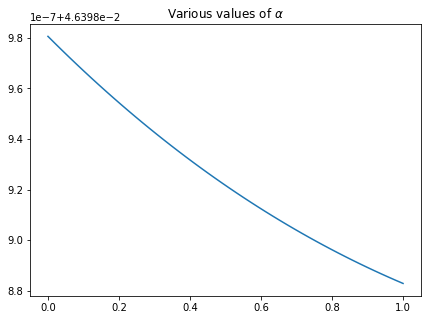

In [65]:
alphas_to_test = np.linspace(0.0001, 1)
rcv = RidgeCV(alphas=alphas_to_test, store_cv_values=True)
rcv.fit(x_train, y_train)
rcv.cv_values_.shape
smallest_idx = rcv.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title(r"Various values of $\alpha$")
xy = (alphas_to_test[smallest_idx], rcv.cv_values_.mean(axis=0)[smallest_idx])
ax.plot(alphas_to_test, rcv.cv_values_.mean(axis=0))

In [74]:
regr = Ridge(alpha=1)
y_pred = regr.fit(x_train, y_train).predict(x_test)
r2_score = regr.score(x_test, y_test)
print("R2 Score: ", r2_score)

R2 Score:  0.5292887919772229


In [75]:
y_test

49002    0.933633
11015    0.185876
7272     0.672831
36406    0.079079
6230     0.812817
           ...   
39260    0.825013
47812    0.591630
31299    0.614958
24237    0.331401
47753    0.838476
Name: normalized_solar, Length: 16985, dtype: float64

MSE: 0.04583181176682184


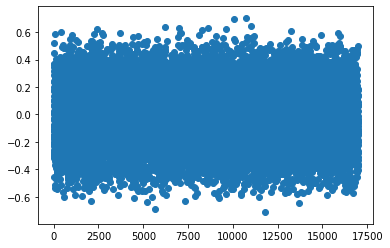

In [115]:
residual = y_pred - y_test
i = len(residual)
plt.scatter(range(i), residual[:i])
print('MSE:',mean_squared_error(y_test,y_pred))

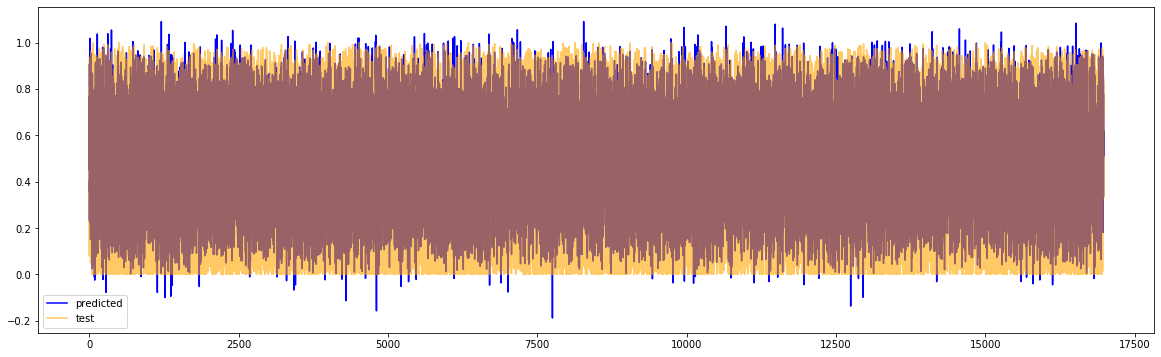

In [94]:
# This graph is all test data
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(i), y_pred[:i], color='blue', label="predicted")
ax.plot(range(i), y_test[:i], color='orange', label="test",alpha=0.6)
ax.legend()